In [62]:
import cv2
from PIL import Image, ImageFilter
import numpy as np
from matplotlib import pyplot as plt

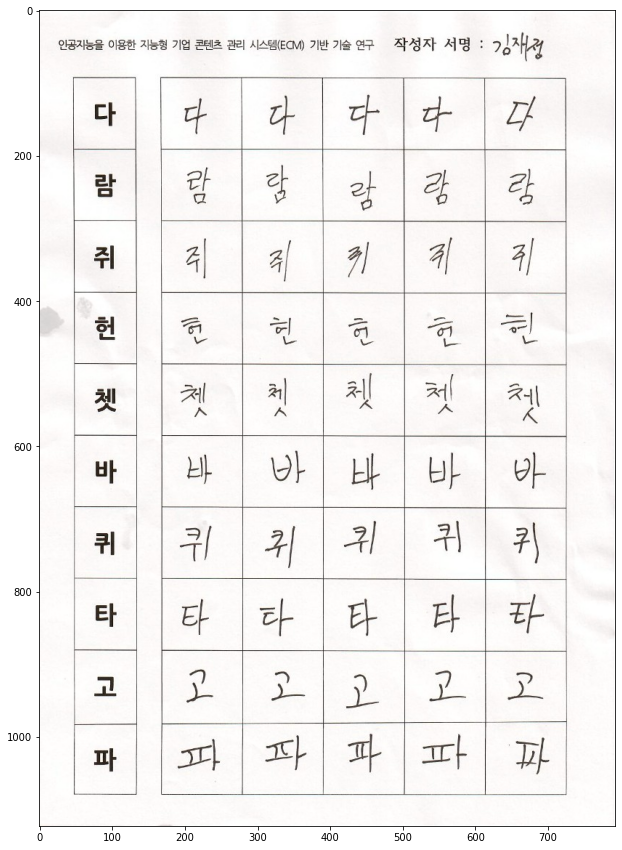

In [63]:
img_original = cv2.imread('testt.png')
plt.figure(figsize = (15, 15))
plt.imshow(img_original)

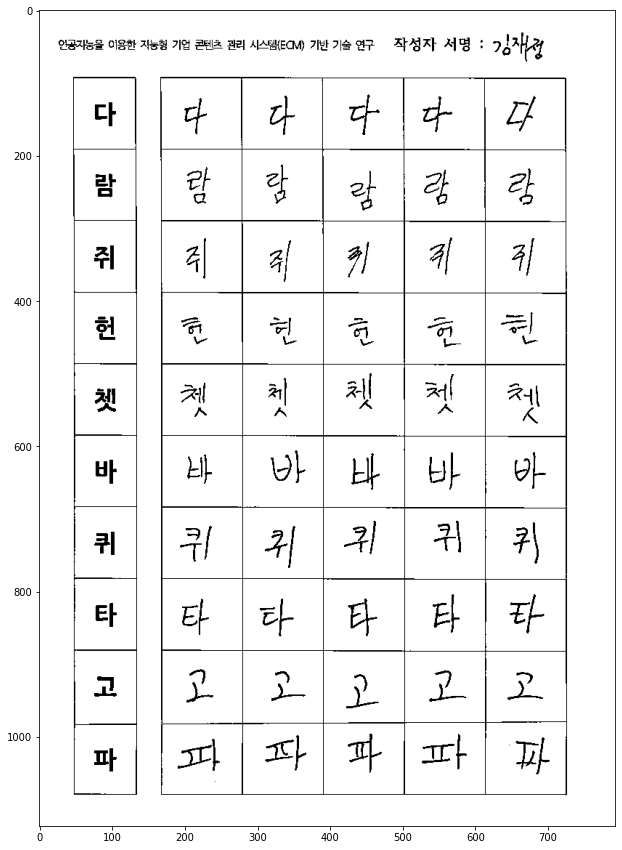

In [64]:
img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
thresh1 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 30)
plt.figure(figsize = (15,15))
plt.imshow(thresh2, cmap = 'gray')

In [65]:
img_original = cv2.imread('testt.png')
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

x, y, w, h = cv2.boundingRect(contours[1])

x, y, w, h

(166, 91, 562, 991)

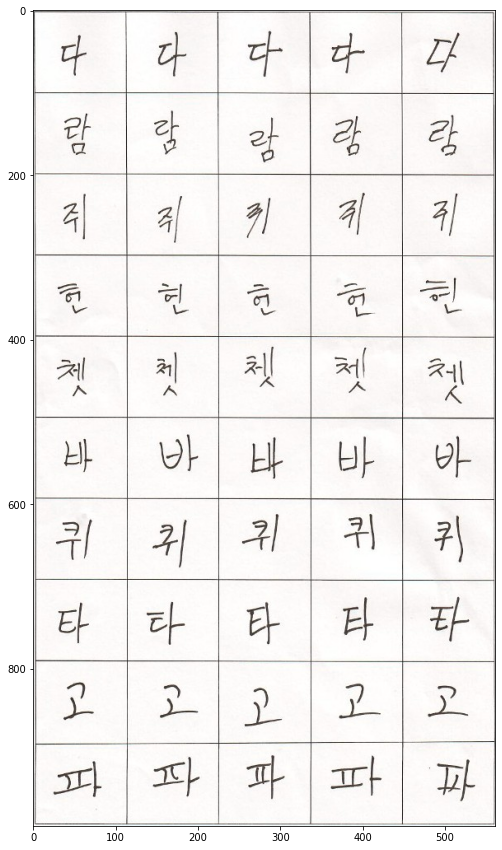

In [59]:
img_trim = img_original[y:y+h, x:x+w]
plt.figure(figsize = (15,15))
plt.imshow(img_trim, cmap = 'gray')

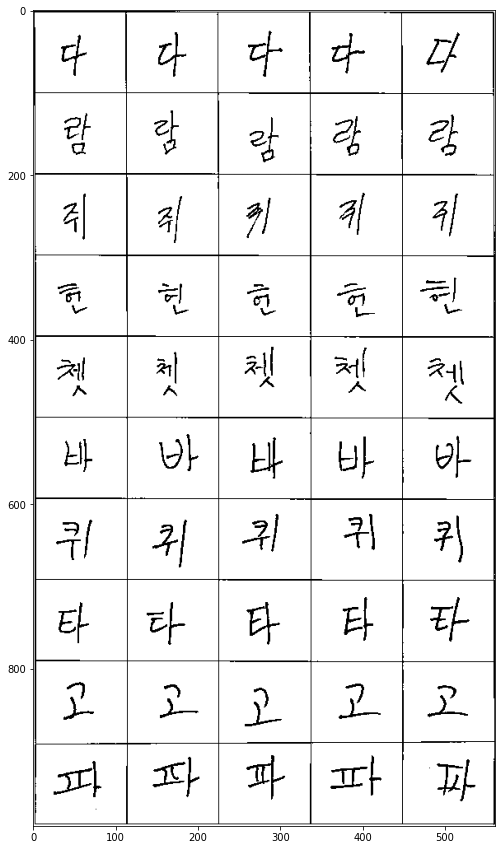

In [71]:
kernel = np.ones((15,15) ,np.uint8)
img_gray = cv2.cvtColor(img_trim, cv2.COLOR_BGR2GRAY)

thresh2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 30)

plt.figure(figsize = (15,15))
plt.imshow(thresh2, cmap = 'gray')

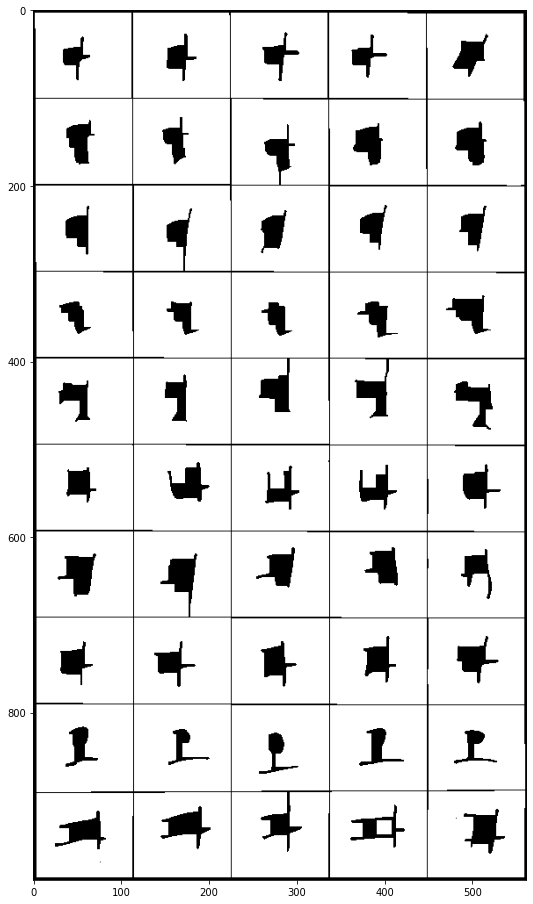

In [77]:
opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, kernel)
plt.figure(figsize = (16,16))
plt.imshow(opening, cmap = 'gray')

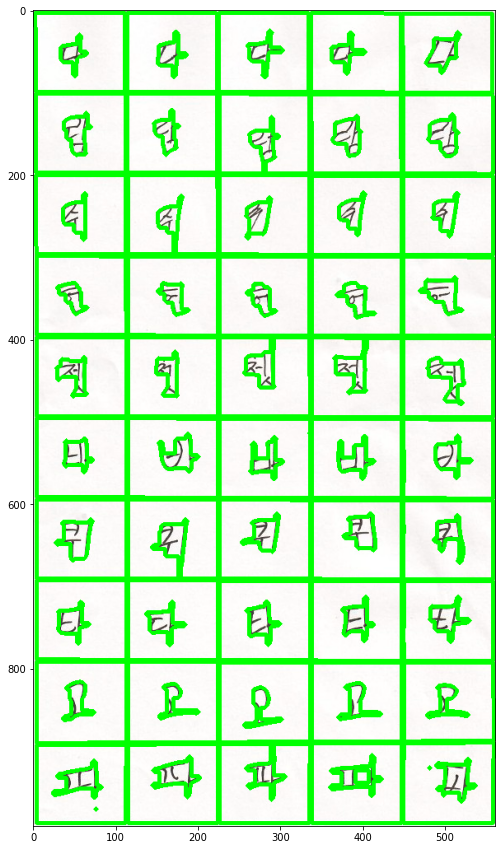

In [78]:
img_original = img_trim
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_contour = cv2.drawContours(img_original, contours, -1, (0, 255, 0), 3)
plt.figure(figsize = (15,15))
plt.imshow(img_contour, cmap = 'gray')

In [79]:
img_temp = img_trim
img_orig = img_trim

In [80]:
contour_pos = []

# 면적이 100 이하인 Contour 영역은 제거
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 437:
        contour_pos.append(pos)

# 면적 부분 오려내기
for pos in contour_pos:
    x, y, w, h = cv2.boundingRect(contours[pos])
    img_crop = img_temp[y:y + h, x:x + w]

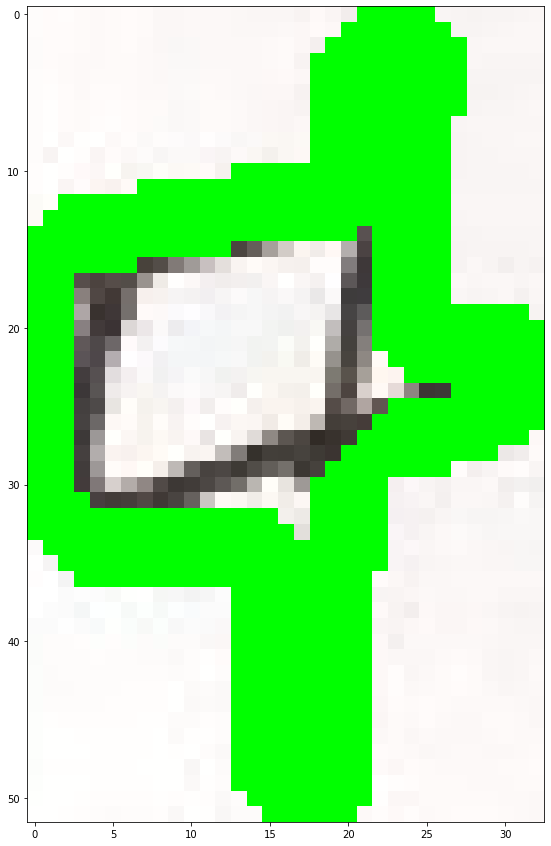

In [81]:
plt.figure(figsize = (15,15))
plt.imshow(img_crop, cmap = 'gray')